# Exploring Corona virus Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('mesumraza/corona-virus-pakistan-dataset-2020')

In [3]:
from zipfile import ZipFile 
zf = ZipFile('corona-virus-pakistan-dataset-2020.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [4]:
covid_data=pd.ExcelFile('COVID_FINAL_DATA.xlsx')
covid_data.sheet_names

['TimeSeries_KeyIndicators',
 'TimeSeries_KeyIndicators_Detail',
 'TimeSeries_Action_Screen',
 'TimeSeries_Action_Call',
 'TimeSeries_COVID_News',
 'TimeSeries_NIH_Response',
 'TimeSeries_NIH_Risk',
 'TimeSeries_Province_Response',
 'TimeSeries_Helpline_Calls',
 'TimeSeries_Quarantine_Details']

**Cleaning Sheet1**

In [259]:
sheet1=covid_data.parse('TimeSeries_KeyIndicators')  #Opening  first sheet
#print(df1.columns) 
sheet1.head()


,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [260]:
sheet1.shape

(552, 12)

In [261]:
sheet1.rename(columns={'Cumulative':'Cases','Discharged':'Recovered','Still admitted':'Hospitalized','Cumulative  Test positive':'Confirmed','New  (last 24 hrs)':'New_cases','Cumulative  tests performed':'Total_tests','Tests  performed in last 24 hours':'New_tests','Expired':'Dead','Home Quarantine':'Home_quarantine'},inplace=True)
sheet1.head()

,Unnamed: 0,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [262]:
sheet1.loc[sheet1['Unnamed: 0']==5] #query based on assigned indexes but doesn't define uniquely row

,Unnamed: 0,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
9,5,67,0,105,2020-03-12 00:00:00,0,0,NaN,6,Punjab,0,10
17,5,71,0,110,2020-03-13 00:00:00,0,0,NaN,4,Punjab,0,5
25,5,77,0,116,2020-03-14 00:00:00,0,0,NaN,6,Punjab,0,6
33,5,83,0,126,2020-03-15 00:00:00,0,0,NaN,6,Punjab,0,10
41,5,95,1,166,2020-03-16 00:00:00,0,0,NaN,12,Punjab,1,40
50,5,112,1,166,2020-03-17 00:00:00,0,0,NaN,17,Punjab,1,No 0
58,5,129,26,133,2020-03-18 00:00:00,0,0,NaN,17,Punjab,26,0
66,5,158,33,254,2020-03-19 00:00:00,0,0,NaN,29,Punjab,33,0
74,5,182,80,872,20-Mar-2020,0,0,NaN,24,Punjab,80,0


In [263]:
sheet1.index

RangeIndex(start=0, stop=552, step=1)

In [264]:
sheet1.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet1.head() 

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
0,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [265]:
#sheet1['Date']=pd.to_datetime(sheet1['Date']).dt.strftime('%d-%m-%Y') #change format acc to Pak date
sheet1['Date']=pd.to_datetime(sheet1.Date)                      #to date type
sheet1.head()

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
0,48,2,80,2020-03-11,0,0,NaN,3,ICT,2,8
1,61,0,95,2020-03-11,0,0,NaN,6,Punjab,0,7
2,84,14,171,2020-03-11,1,0,NaN,1,Sindh,13,55
3,20,0,28,2020-03-11,0,0,NaN,0,KP,0,2
4,3,0,0,2020-03-11,0,0,NaN,0,KPTD,0,0


In [266]:
print(sheet1.info())
print(sheet1.isnull().sum())                                     #finding NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 11 columns):
Cases              552 non-null int64
Confirmed          552 non-null int64
Total_tests        552 non-null int64
Date               552 non-null datetime64[ns]
Recovered          552 non-null int64
Dead               552 non-null int64
Home_quarantine    413 non-null float64
New_cases          552 non-null int64
Region             552 non-null object
Hospitalized       552 non-null int64
New_tests          552 non-null object
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 47.6+ KB
None
Cases                0
Confirmed            0
Total_tests          0
Date                 0
Recovered            0
Dead                 0
Home_quarantine    139
New_cases            0
Region               0
Hospitalized         0
New_tests            0
dtype: int64


In [267]:
sheet1[sheet1['New_tests'].isin(['.','?','na','NA','N/A',np.nan,'No 0'])]

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
50,112,1,166,2020-03-17,0,0,NaN,17,Punjab,1,No 0


In [268]:
sheet1.isin(['.','?','na','NA','N/A',np.nan,'No 0'])

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
0,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
547,False,False,False,False,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False,False,False,False,False
549,False,False,False,False,False,False,False,False,False,False,False
550,False,False,False,False,False,False,False,False,False,False,False


In [269]:
sheet1['New_tests'].replace({'No 0':'0'},inplace=True)  #replacing No 0 value in New_tests with 0 as its like null but 0 for this column either count of test performed or not
sheet1[sheet1['New_tests'].isin(['.','?','na','NA','N/A',np.nan,'No 0'])]

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests


In [270]:
sheet1['New_tests']=sheet1['New_tests'].apply(np.int64)       #change type of New_testsas its ineteger
sheet1['Home_quarantine'].fillna(0,inplace=True)                #filling with 0 becuase at that time no homequarantine    
sheet1['Home_quarantine']=sheet1['Home_quarantine'].apply(np.int64)          #it can't be float
print(sheet1.isnull().sum())
print(sheet1.info())

Cases              0
Confirmed          0
Total_tests        0
Date               0
Recovered          0
Dead               0
Home_quarantine    0
New_cases          0
Region             0
Hospitalized       0
New_tests          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 11 columns):
Cases              552 non-null int64
Confirmed          552 non-null int64
Total_tests        552 non-null int64
Date               552 non-null datetime64[ns]
Recovered          552 non-null int64
Dead               552 non-null int64
Home_quarantine    552 non-null int64
New_cases          552 non-null int64
Region             552 non-null object
Hospitalized       552 non-null int64
New_tests          552 non-null int64
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 47.6+ KB
None


In [271]:
sheet1.duplicated().sum()

0

In [272]:
sheet1.Region.unique()

array(['ICT', 'Punjab', 'Sindh', 'KP', 'KPTD', 'Balochistan', 'AJK', 'GB',
       'Mobile Lab'], dtype=object)

In [273]:
sheet1.loc[sheet1['Region']=='KPTD']    #data is not defined for KPTD(Federally Administered Tribal Areas)

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
4,3,0,0,2020-03-11,0,0,0,0,KPTD,0,0
12,3,0,0,2020-03-12,0,0,0,0,KPTD,0,0
20,4,0,0,2020-03-13,0,0,0,1,KPTD,0,0
28,4,0,0,2020-03-14,0,0,0,0,KPTD,0,0
36,5,0,0,2020-03-15,0,0,0,1,KPTD,0,0
44,5,0,0,2020-03-16,0,0,0,0,KPTD,0,0
53,5,0,0,2020-03-17,0,0,0,0,KPTD,0,0
61,6,0,0,2020-03-18,0,0,0,1,KPTD,0,0
69,7,0,0,2020-03-19,0,0,0,1,KPTD,0,0
77,19,0,0,2020-03-20,0,0,0,12,KPTD,0,0


In [274]:
sheet1.loc[sheet1['Region']=='KPTD'].shape

(12, 11)

In [275]:
sheet1.loc[sheet1['Region']=='Mobile Lab']    

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
48,0,6,28,2020-03-16,0,0,0,0,Mobile Lab,0,6


In [276]:
sheet1.drop(sheet1.loc[sheet1['Region'].isin(['KPTD','Mobile Lab'])].index,inplace=True)
sheet1.shape

(539, 11)

**Adding new column which show the active cases**

In [277]:
sheet1['Active']=sheet1['Confirmed']-sheet1['Dead']-sheet1['Recovered']

In [278]:
sheet1[['Active','Date','Region']]

,Active,Date,Region
0,2,2020-03-11,ICT
1,0,2020-03-11,Punjab
2,13,2020-03-11,Sindh
3,0,2020-03-11,KP
5,1,2020-03-11,Balochistan
...,...,...,...
547,172,2020-05-27,GB
548,1709,2020-05-27,ICT
549,5265,2020-05-27,KP
550,14571,2020-05-27,Punjab


In [279]:
sheet1.filter(['Active','Region','Date']).groupby('Date').agg('sum')

,Active
Date,
2020-03-11,18
2020-03-12,18
2020-03-13,19
2020-03-14,25
2020-03-15,28
...,...
2020-05-23,34683
2020-05-24,36270
2020-05-25,37700


In [280]:
sheet1=sheet1[['Date','Region','Cases','Confirmed','Recovered','Dead','Active','Hospitalized','Home_quarantine','New_cases','Total_tests','New_tests']]

In [281]:
sheet1.describe()          #descriptive statistics

,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,19260.502783,2232.654917,679.666048,46.909091,1506.079777,446.651206,1077.996289,831.263451,21517.923933,1101.027829
std,35559.904219,4401.707031,1461.990294,92.722760,2964.952008,1123.616916,2497.245886,1426.212518,40217.956111,2324.671657
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-5670.000000
25%,910.000000,78.000000,2.000000,0.000000,55.000000,15.000000,0.000000,47.000000,1159.000000,0.500000
50%,4490.000000,335.000000,77.000000,3.000000,186.000000,39.000000,85.000000,190.000000,4242.000000,175.000000
75%,18778.000000,1959.500000,455.500000,35.000000,1478.500000,388.000000,846.500000,909.000000,19710.000000,1025.000000
max,182977.000000,23507.000000,8668.000000,416.000000,14765.000000,9418.000000,21452.000000,7159.000000,213297.000000,12219.000000


In [282]:
sheet1.Region.value_counts()

Balochistan    77
Punjab         77
GB             77
AJK            77
ICT            77
Sindh          77
KP             77
Name: Region, dtype: int64

In [283]:
min(sheet1['Date'])

Timestamp('2020-03-11 00:00:00')

In [284]:
max(sheet1['Date'])

Timestamp('2020-05-27 00:00:00')

In [285]:
max(sheet1['Date'])-min(sheet1['Date'])

Timedelta('77 days 00:00:00')

**Check for missing Dates**

In [286]:
sheet_1=sheet1.copy(deep=True)

In [287]:
sheet_1.set_index('Date',inplace=True)

In [288]:
pd.date_range(start =sheet_1.index.min(), end =sheet_1.index.max()).difference(sheet_1.index)

DatetimeIndex(['2020-05-03'], dtype='datetime64[ns]', freq=None)

In [289]:
ict_data=sheet_1[sheet_1.Region=='ICT']

In [290]:
ict_data=ict_data.resample('D').ffill()

In [291]:
punjab_data=sheet_1[sheet_1.Region=='Punjab']

In [292]:
punjab_data=punjab_data.resample('D').ffill()

In [293]:
sindh_data=sheet_1[sheet_1.Region=='Sindh']

In [294]:
sindh_data=sindh_data.resample('D').ffill()

In [295]:
kp_data=sheet_1[sheet_1.Region=='KP']

In [296]:
kp_data=kp_data.resample('D').ffill()

In [297]:
baloch_data=sheet_1[sheet_1.Region=='Balochistan']

In [298]:
baloch_data=baloch_data.resample('D').ffill()

In [299]:
gb_data=sheet_1[sheet_1.Region=='GB']

In [300]:
gb_data=gb_data.resample('D').ffill()

In [301]:
gb_data.shape

(78, 11)

In [302]:
ajk_data=sheet_1[sheet_1.Region=='AJK']

In [303]:
ajk_data=ajk_data.resample('D').ffill()

In [304]:
sheet_1=pd.concat([ict_data,punjab_data,sindh_data,kp_data,baloch_data,ajk_data,gb_data])

In [305]:
sheet_1.head()

,Region,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests
Date,,,,,,,,,,,
2020-03-11,ICT,48,2,0,0,2,2,0,3,80,8
2020-03-12,ICT,52,2,0,0,2,2,0,4,85,5
2020-03-13,ICT,57,2,0,0,2,2,0,5,92,7
2020-03-14,ICT,62,3,0,0,3,3,0,5,99,7
2020-03-15,ICT,65,4,0,0,4,4,0,3,115,16


In [306]:
sheet_1.shape

(546, 11)

In [307]:
sheet_1.index

DatetimeIndex(['2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20',
               ...
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27'],
              dtype='datetime64[ns]', name='Date', length=546, freq=None)

In [308]:
sheet_1.reset_index(inplace=True)

In [309]:
sheet_1.sort_values(by='Date',inplace=True)

In [310]:
daily_confirmed = (sheet_1
 .sort_values(by = ['Region', 'Date'])
 .filter(['Region','Date','Confirmed'])
 .groupby(['Region'])
 .Confirmed
 .diff()
)

In [311]:
sheet_1=sheet_1.assign(Daily_confirmed=daily_confirmed)
sheet_1.head()

,Date,Region,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests,Daily_confirmed
0,2020-03-11,ICT,48,2,0,0,2,2,0,3,80,8,NaN
156,2020-03-11,Sindh,84,14,1,0,13,13,0,1,171,55,NaN
390,2020-03-11,AJK,3,0,0,0,0,0,0,0,4,0,NaN
468,2020-03-11,GB,10,2,0,0,2,2,0,0,26,4,NaN
234,2020-03-11,KP,20,0,0,0,0,0,0,0,28,2,NaN


In [312]:
sheet_1['Daily_confirmed'].replace({np.nan:'0'},inplace=True)

In [313]:
daily_dead = (sheet_1
.sort_values(by=['Region', 'Date'])
.filter(['Region','Date','Dead'])
.groupby(['Region'])
.Dead
.diff()
)

In [314]:
daily_dead.head()

390    NaN
391    0.0
392    0.0
393    0.0
394    0.0
Name: Dead, dtype: float64

In [315]:
sheet_1=sheet_1.assign(Daily_dead=daily_dead)

In [316]:
daily_cure = (sheet_1
.sort_values(by=['Region', 'Date'])
.filter(['Region','Date','Recovered'])
.groupby(['Region'])
.Recovered
.diff()
)

In [317]:
sheet_1=sheet_1.assign(Daily_cured=daily_cure)

In [318]:
sheet_1[['Daily_cured','Daily_dead']].replace({np.nan:'0'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [319]:
confirmed_by_date = (sheet_1.filter(['Date','Confirmed']).groupby('Date').agg('sum').reset_index())
confirmed_by_date

,Date,Confirmed
0,2020-03-11,19
1,2020-03-12,20
2,2020-03-13,21
3,2020-03-14,28
4,2020-03-15,31
...,...,...
73,2020-05-23,52437
74,2020-05-24,54601
75,2020-05-25,56349
76,2020-05-26,57705


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


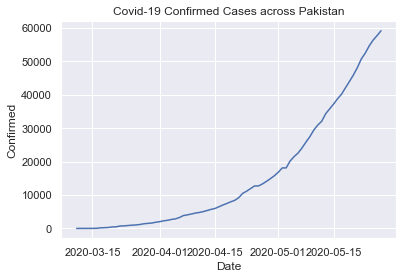

In [65]:
sns.set()
fig=sns.lineplot(data = confirmed_by_date,x = 'Date',y = 'Confirmed')
plt.title("Covid-19 Confirmed Cases across Pakistan");

In [66]:
confirmed_by_regions = (sheet_1.filter(['Region','Date','Confirmed']).groupby(['Date','Region']).agg('sum').reset_index())
confirmed_by_regions

,Date,Region,Confirmed
0,2020-03-11,AJK,0
1,2020-03-11,Balochistan,1
2,2020-03-11,GB,2
3,2020-03-11,ICT,2
4,2020-03-11,KP,0
...,...,...,...
541,2020-05-27,GB,638
542,2020-05-27,ICT,1879
543,2020-05-27,KP,8259
544,2020-05-27,Punjab,21118


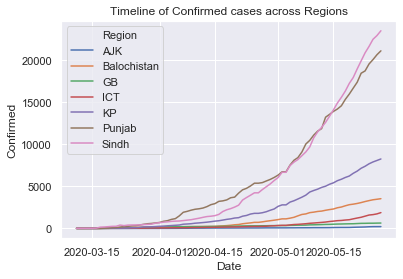

In [67]:
sns.lineplot(data = confirmed_by_regions,x = 'Date',y = 'Confirmed',hue='Region')
plt.title("Timeline of Confirmed cases across Regions");

In [68]:
dead_by_date = (sheet_1.filter(['Date','Dead']).groupby('Date').agg('sum').reset_index())
dead_by_date

,Date,Dead
0,2020-03-11,0
1,2020-03-12,0
2,2020-03-13,0
3,2020-03-14,0
4,2020-03-15,0
...,...,...
73,2020-05-23,1101
74,2020-05-24,1133
75,2020-05-25,1167
76,2020-05-26,1197


In [69]:
sheet_1.filter(['Dead','Date','Region'])

,Dead,Date,Region
0,0,2020-03-11,ICT
156,0,2020-03-11,Sindh
390,0,2020-03-11,AJK
468,0,2020-03-11,GB
234,0,2020-03-11,KP
...,...,...,...
233,374,2020-05-27,Sindh
389,42,2020-05-27,Balochistan
155,362,2020-05-27,Punjab
311,416,2020-05-27,KP


In [70]:
test_by_date = sheet_1.filter(['Date','Total_tests']).groupby('Date').agg('sum')
test_by_date

,Total_tests
Date,
2020-03-11,422
2020-03-12,471
2020-03-13,531
2020-03-14,609
2020-03-15,686
...,...
2020-05-23,460692
2020-05-24,473607
2020-05-25,483656


In [71]:
regions_data=sheet_1[sheet_1.Date==max(sheet_1.Date)].filter(['Region','Confirmed','Dead','Recovered','Total_tests','Total_cases','New_cases']).groupby('Region').agg('sum')
regions_data

,Confirmed,Dead,Recovered,Total_tests,New_cases
Region,,,,,
AJK,214,4,99,5379,38
Balochistan,3536,42,1156,21866,222
GB,638,9,457,7761,89
ICT,1879,18,152,35551,587
KP,8259,416,2578,53917,602
Punjab,21118,362,6185,213297,2439
Sindh,23507,374,8515,161628,2327


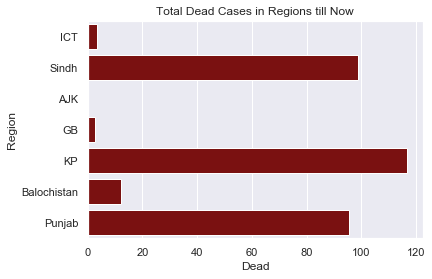

In [72]:
sns.barplot(data=sheet_1,x='Dead',y='Region',color='darkred',ci=None)
plt.title("Total Dead Cases in Regions till Now");

In [73]:
n_hospitalized=sheet_1.filter(['Date','Hospitalized']).groupby(['Date']).agg('sum').reset_index()
n_hospitalized

,Date,Hospitalized
0,2020-03-11,18
1,2020-03-12,18
2,2020-03-13,19
3,2020-03-14,25
4,2020-03-15,28
...,...,...
73,2020-05-23,4417
74,2020-05-24,4231
75,2020-05-25,4365
76,2020-05-26,4429


In [74]:
n_home=sheet_1.filter(['Region','Date','Home_quarantine']).groupby(['Date']).agg('sum').reset_index()
n_home

,Date,Home_quarantine
0,2020-03-11,0
1,2020-03-12,0
2,2020-03-13,0
3,2020-03-14,0
4,2020-03-15,0
...,...,...
73,2020-05-23,30266
74,2020-05-24,32039
75,2020-05-25,33335
76,2020-05-26,33765


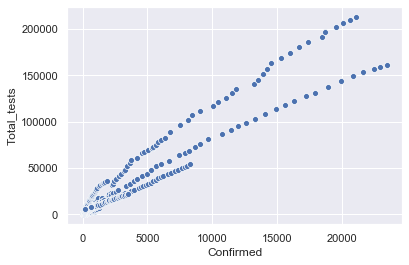

In [75]:
sns.scatterplot(data=sheet1,x='Confirmed',y='Total_tests')

In [76]:
#sns.pairplot(sheet1,hue='Region');

In [77]:
sheet_1.corr()

,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests,Daily_cured
Cases,1.000000,0.984606,0.934509,0.836439,0.973643,0.777534,0.813183,0.863157,0.988018,0.892221,0.126658
Confirmed,0.984606,1.000000,0.949537,0.881978,0.987642,0.726813,0.855253,0.835164,0.965794,0.875165,0.133472
Recovered,0.934509,0.949537,1.000000,0.842548,0.888863,0.688176,0.771447,0.783787,0.913615,0.812176,0.285460
Dead,0.836439,0.881978,0.842548,1.000000,0.861603,0.596557,0.759567,0.703255,0.811764,0.749597,0.109625
Active,0.973643,0.987642,0.888863,0.861603,1.000000,0.720196,0.864674,0.830465,0.956821,0.874382,0.053339
Hospitalized,0.777534,0.726813,0.688176,0.596557,0.720196,1.000000,0.397778,0.774106,0.815310,0.735159,0.083722
Home_quarantine,0.813183,0.855253,0.771447,0.759567,0.864674,0.397778,1.000000,0.628791,0.775917,0.709352,0.084569
New_cases,0.863157,0.835164,0.783787,0.703255,0.830465,0.774106,0.628791,1.000000,0.870165,0.821328,0.130714
Total_tests,0.988018,0.965794,0.913615,0.811764,0.956821,0.815310,0.775917,0.870165,1.000000,0.882633,0.123175
New_tests,0.892221,0.875165,0.812176,0.749597,0.874382,0.735159,0.709352,0.821328,0.882633,1.000000,0.197551


In [78]:

hospitalized_by_region=sheet_1[sheet_1.Date==max(sheet_1.Date)].filter(['Region','Hospitalized']).groupby(['Region']).agg('sum')

In [79]:
hospitalized_by_region

,Hospitalized
Region,
AJK,111
Balochistan,109
GB,24
ICT,31
KP,403
Punjab,2177
Sindh,1687


In [80]:
total_recovered=sheet_1.filter(['Date','Region','Recovered']).groupby(['Date']).agg('sum')
total_recovered

,Recovered
Date,
2020-03-11,1
2020-03-12,2
2020-03-13,2
2020-03-14,3
2020-03-15,3
...,...
2020-05-23,16653
2020-05-24,17198
2020-05-25,17482


In [81]:
total_suspectcases=sheet_1[sheet_1.Date==max(sheet_1.Date)].filter(['Region','Cases']).groupby('Region').agg('sum')
total_suspectcases

,Cases
Region,
AJK,5379
Balochistan,20574
GB,8175
ICT,35551
KP,49627
Punjab,182977
Sindh,161628


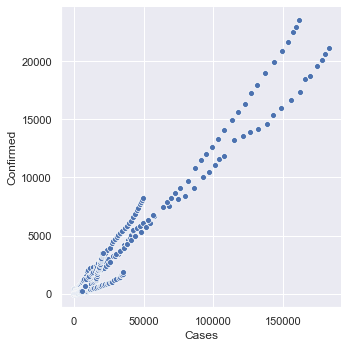

In [82]:
sns.relplot(data=sheet_1,x='Cases',y='Confirmed')

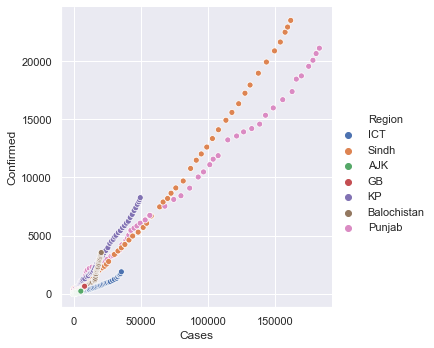

In [83]:
sns.relplot(data=sheet_1,x='Cases',y='Confirmed',hue='Region')

In [84]:
sheet_1[sheet_1['Date']==max(sheet_1.Date)].filter(['Date','Cases','Confirmed','Recovered','Dead']).groupby('Date').agg('sum')

,Cases,Confirmed,Recovered,Dead
Date,,,,
2020-05-27,463911,59151,19142,1225


In [85]:
week_data=sheet_1.filter(['Region','Date','New_tests','New_cases'])

week_data.set_index('Date',inplace=True)
wk_data=week_data.resample('W').sum()

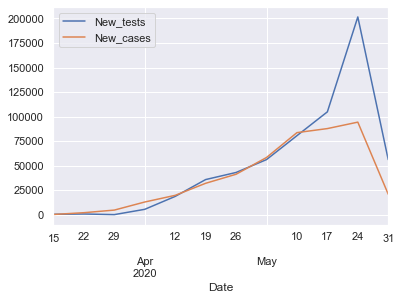

In [86]:
wk_data.plot();

**Cleaning Sheet 2**

In [87]:
sheet2=covid_data.parse('TimeSeries_KeyIndicators_Detail')  #Opening  second sheet 
sheet2.head()


,Date,Province Old,Suspected Cases Last Date,Suspected Cases Last 24 Hrs,Suspected Cases Cumulative,Lab Tests Last 24 Hrs,Lab Tests Cumulative,Confirmed Cases Last Date,Confirmed Cases Last 24 Hrs,Confirmed Cases Cumulative,...,Confirmed HW - Active Nurses,Confirmed HW - Active Others,Confirmed HW - Active Total,Confirmed HW - Active Isolation,Confirmed HW - Active Hospital,Confirmed HW - Active Hospital Stable,Confirmed HW - Active Hospital Ventilator,Confirmed HW - Active Recovered,Confirmed HW - Active Deaths,Unnamed: 53
0,2020-04-04,AJK,322,21,343,21,343,9,2,11,...,0,0,0,0,0,0,0,0,0,NaN
1,2020-04-04,Balochistan,2171,230,2401,0,2401,169,6,175,...,0,0,0,0,0,0,0,0,0,NaN
2,2020-04-04,GB,961,2,963,844,860,190,3,193,...,0,0,0,0,0,0,0,0,0,NaN
3,2020-04-04,ICT,2395,174,2569,174,2569,68,7,75,...,0,0,0,0,0,0,0,0,0,NaN
4,2020-04-04,KP,1938,431,2369,181,1624,311,32,343,...,0,0,0,0,0,0,0,0,0,NaN


In [88]:
sheet2.shape

(280, 54)

In [89]:
sheet2.index

RangeIndex(start=0, stop=280, step=1)

In [90]:
sheet2.columns

Index(['Date', 'Province Old', 'Suspected Cases Last Date',
       'Suspected Cases Last 24 Hrs', 'Suspected Cases Cumulative',
       'Lab Tests Last 24 Hrs', 'Lab Tests Cumulative',
       'Confirmed Cases Last Date', 'Confirmed Cases Last 24 Hrs',
       'Confirmed Cases Cumulative', ' Deaths Last Date',
       ' Deaths Last 24 Hrs', ' Deaths Cumulative',
       ' Deaths Ventilator Last 24 Hrs', 'Transmission Total',
       'Transmission Foreign - Iran', 'Transmission Foreign - Iran %',
       'Transmission Foreign - Other', 'Transmission Foreign - Other %',
       'Transmission Local - Tableegh', 'Transmission Local % - Tableegh',
       'Transmission Local - Others', 'Transmission Local % - Others',
       'Transmission Local', 'Transmission Local %', 'Total Hospitals',
       'Beds for COVID', 'Total Admitted', 'Admitted Stable',
       'Admitted Critical', 'Admitted Venilator', 'Home Quarantine',
       'Recovered', 'Death', 'Quarantine Facilities', 'Last 24 Hrs Arrival',
      

In [91]:
sheet2[sheet2.columns[11:]]

,Deaths Last 24 Hrs,Deaths Cumulative,Deaths Ventilator Last 24 Hrs,Transmission Total,Transmission Foreign - Iran,Transmission Foreign - Iran %,Transmission Foreign - Other,Transmission Foreign - Other %,Transmission Local - Tableegh,Transmission Local % - Tableegh,...,Confirmed HW - Active Nurses,Confirmed HW - Active Others,Confirmed HW - Active Total,Confirmed HW - Active Isolation,Confirmed HW - Active Hospital,Confirmed HW - Active Hospital Stable,Confirmed HW - Active Hospital Ventilator,Confirmed HW - Active Recovered,Confirmed HW - Active Deaths,Unnamed: 53
0,0,0,0,11,1,0.09,2,0.18,0,0.00,...,0,0,0,0,0,0,0,0,0,NaN
1,0,1,0,175,139,0.79,2,0.01,0,0.00,...,0,0,0,0,0,0,0,0,0,NaN
2,0,3,0,193,155,0.80,5,0.03,0,0.00,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,75,0,0.00,17,0.23,0,0.00,...,0,0,0,0,0,0,0,0,0,NaN
4,2,11,0,343,69,0.20,163,0.48,0,0.00,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,4,0,602,166,0.28,5,0.01,27,0.04,...,4,2,32,38,0,16,16,0,20,2.0
276,2,12,2,1326,0,0.00,22,0.02,12,0.01,...,62,46,50,158,142,3,3,0,12,1.0
277,14,365,14,7155,71,0.01,985,0.14,315,0.04,...,186,70,169,425,230,22,22,0,170,3.0
278,13,310,13,18455,768,0.04,1231,0.07,1926,0.10,...,93,93,103,289,73,106,106,0,110,0.0


In [92]:
sheet2.columns=sheet2.columns.str.strip().str.capitalize().str.replace(' ','_')

In [93]:
sheet2['Province_old'].unique()

array(['AJK', 'Balochistan', 'GB', 'ICT', 'KP', 'Punjab', 'Sindh'],
      dtype=object)

In [94]:
sheet2.head()

,Date,Province_old,Suspected_cases_last_date,Suspected_cases_last_24_hrs,Suspected_cases_cumulative,Lab_tests_last_24_hrs,Lab_tests_cumulative,Confirmed_cases_last_date,Confirmed_cases_last_24_hrs,Confirmed_cases_cumulative,...,Confirmed_hw_-_active_nurses,Confirmed_hw_-_active_others,Confirmed_hw_-_active_total,Confirmed_hw_-_active_isolation,Confirmed_hw_-_active_hospital,Confirmed_hw_-_active_hospital_stable,Confirmed_hw_-_active_hospital_ventilator,Confirmed_hw_-_active_recovered,Confirmed_hw_-_active_deaths,Unnamed:_53
0,2020-04-04,AJK,322,21,343,21,343,9,2,11,...,0,0,0,0,0,0,0,0,0,NaN
1,2020-04-04,Balochistan,2171,230,2401,0,2401,169,6,175,...,0,0,0,0,0,0,0,0,0,NaN
2,2020-04-04,GB,961,2,963,844,860,190,3,193,...,0,0,0,0,0,0,0,0,0,NaN
3,2020-04-04,ICT,2395,174,2569,174,2569,68,7,75,...,0,0,0,0,0,0,0,0,0,NaN
4,2020-04-04,KP,1938,431,2369,181,1624,311,32,343,...,0,0,0,0,0,0,0,0,0,NaN


In [95]:
sheet2.info()                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 54 columns):
Date                                         280 non-null datetime64[ns]
Province_old                                 280 non-null object
Suspected_cases_last_date                    280 non-null int64
Suspected_cases_last_24_hrs                  280 non-null int64
Suspected_cases_cumulative                   280 non-null int64
Lab_tests_last_24_hrs                        280 non-null int64
Lab_tests_cumulative                         280 non-null int64
Confirmed_cases_last_date                    280 non-null int64
Confirmed_cases_last_24_hrs                  280 non-null int64
Confirmed_cases_cumulative                   280 non-null int64
Deaths_last_date                             280 non-null int64
Deaths_last_24_hrs                           280 non-null int64
Deaths_cumulative                            280 non-null int64
Deaths_ventilator_last_24_hrs                280 non-

In [96]:
sheet2.duplicated().sum()

0

In [97]:
sheet2.isnull().sum()

Date                                           0
Province_old                                   0
Suspected_cases_last_date                      0
Suspected_cases_last_24_hrs                    0
Suspected_cases_cumulative                     0
Lab_tests_last_24_hrs                          0
Lab_tests_cumulative                           0
Confirmed_cases_last_date                      0
Confirmed_cases_last_24_hrs                    0
Confirmed_cases_cumulative                     0
Deaths_last_date                               0
Deaths_last_24_hrs                             0
Deaths_cumulative                              0
Deaths_ventilator_last_24_hrs                  0
Transmission_total                             0
Transmission_foreign_-_iran                    0
Transmission_foreign_-_iran_%                  0
Transmission_foreign_-_other                   0
Transmission_foreign_-_other_%                 0
Transmission_local_-_tableegh                  0
Transmission_local_%

In [98]:
sheet2.isin([0]).sum()    #where column has 0 values

Date                                           0
Province_old                                   0
Suspected_cases_last_date                      0
Suspected_cases_last_24_hrs                    4
Suspected_cases_cumulative                     0
Lab_tests_last_24_hrs                          1
Lab_tests_cumulative                           0
Confirmed_cases_last_date                      0
Confirmed_cases_last_24_hrs                   14
Confirmed_cases_cumulative                     0
Deaths_last_date                              37
Deaths_last_24_hrs                           139
Deaths_cumulative                             35
Deaths_ventilator_last_24_hrs                215
Transmission_total                             0
Transmission_foreign_-_iran                   40
Transmission_foreign_-_iran_%                 40
Transmission_foreign_-_other                   0
Transmission_foreign_-_other_%                24
Transmission_local_-_tableegh                 24
Transmission_local_%

In [99]:
sheet2.isin([0]).sum()>=len(sheet2)/2   #which columns has 0 values equal or more than number of enteries or length of dataframe

Date                                         False
Province_old                                 False
Suspected_cases_last_date                    False
Suspected_cases_last_24_hrs                  False
Suspected_cases_cumulative                   False
Lab_tests_last_24_hrs                        False
Lab_tests_cumulative                         False
Confirmed_cases_last_date                    False
Confirmed_cases_last_24_hrs                  False
Confirmed_cases_cumulative                   False
Deaths_last_date                             False
Deaths_last_24_hrs                           False
Deaths_cumulative                            False
Deaths_ventilator_last_24_hrs                 True
Transmission_total                           False
Transmission_foreign_-_iran                  False
Transmission_foreign_-_iran_%                False
Transmission_foreign_-_other                 False
Transmission_foreign_-_other_%               False
Transmission_local_-_tableegh  

In [100]:
cols=np.where(((sheet2.isin([0]).sum())>=(len(sheet2)/2))==True)
cols

(array([13, 30, 36, 44, 47, 48, 49, 50, 51, 52], dtype=int64),)

**Dropping Columns more than length of datatframe or enteries**

In [101]:
sheet2.drop(sheet2.columns[cols],axis=1,inplace=True)

In [102]:
sheet2.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                                 0
Province_old                         0
Suspected_cases_last_date            0
Suspected_cases_last_24_hrs          0
Suspected_cases_cumulative           0
Lab_tests_last_24_hrs                0
Lab_tests_cumulative                 0
Confirmed_cases_last_date            0
Confirmed_cases_last_24_hrs          0
Confirmed_cases_cumulative           0
Deaths_last_date                     0
Deaths_last_24_hrs                   0
Deaths_cumulative                    0
Transmission_total                   0
Transmission_foreign_-_iran          0
Transmission_foreign_-_iran_%        0
Transmission_foreign_-_other         0
Transmission_foreign_-_other_%       0
Transmission_local_-_tableegh        0
Transmission_local_%_-_tableegh      0
Transmission_local_-_others          0
Transmission_local_%_-_others        0
Transmission_local                   0
Transmission_local_%                 0
Total_hospitals                      0
Beds_for_covid           

In [103]:
sheet2.drop('Unnamed:_53',axis=1,inplace=True)
sheet2.shape

(280, 43)

In [104]:
sheet2.rename(columns={'Province_old':'Region','Suspected_cases_last_date':'Cases(till)','Suspected_cases_last_24_hrs':'Cases (24 hrs)','Suspected_cases_cumulative':'Total_cases','Lab_tests_last_24_hrs':'New_labtest','Lab_tests_cumulative':'Total_labtests','Confirmed_cases_last_date':'Confirmed (till)','Confirmed_cases_last_24_hrs':'New_confirmed','Confirmed_cases_cumulative':'Total_confirmed','Deaths_last_date':'Death (till)','Deaths_cumulative':'Total_deaths','Last_24_hrs_arrival':'New_arrivals','Last_24_hrs_departure':'New_departure','Cumulative_quarantined':'Total_quarantine','Test_positive_cases':'Test_positive','Test_positive_cases_%':'Test_postive(%)'},inplace=True)


In [105]:
sheet2.rename(columns={'Transmission_foreign_-_iran':'Foreign_transmission(Iran)','Transmission_foreign_-_iran_%':'%Foreign_transmission(Iran)','Transmission_foreign_-_other':'Foreign_transmission(other)','Transmission_foreign_-_other_%':'%Foreign_transmission(Other)','Transmission_local_-_tableegh':'Local_transmission(Tableegh)','Transmission_local_%_-_tableegh':'%Local_transmission(Tableegh)','Transmission_local_-_others':'Local_transmission(Other)','Transmission_local_%_-_others':'%Local_transmission(Other)','Transmission_local':'Total_Transmission(local)','Transmission_local_%':'%Total_Transmission(local)'},inplace=True)

In [106]:
sheet2.columns

Index(['Date', 'Region', 'Cases(till)', 'Cases (24 hrs)', 'Total_cases',
       'New_labtest', 'Total_labtests', 'Confirmed (till)', 'New_confirmed',
       'Total_confirmed', 'Death (till)', 'Deaths_last_24_hrs', 'Total_deaths',
       'Transmission_total', 'Foreign_transmission(Iran)',
       '%Foreign_transmission(Iran)', 'Foreign_transmission(other)',
       '%Foreign_transmission(Other)', 'Local_transmission(Tableegh)',
       '%Local_transmission(Tableegh)', 'Local_transmission(Other)',
       '%Local_transmission(Other)', 'Total_Transmission(local)',
       '%Total_Transmission(local)', 'Total_hospitals', 'Beds_for_covid',
       'Total_admitted', 'Admitted_stable', 'Admitted_critical',
       'Home_quarantine', 'Recovered', 'Death', 'Quarantine_facilities',
       'New_arrivals', 'New_departure', 'Total_quarantine', 'Number_of_tests',
       'Results_achieved', 'Test_positive', 'Test_postive(%)',
       'Confirmed_hw_-_active_doctors', 'Confirmed_hw_-_active_others',
       'Co

In [107]:
min(sheet2.Date)

Timestamp('2020-04-04 00:00:00')

In [108]:
max(sheet2.Date)

Timestamp('2020-05-22 00:00:00')

In [109]:
max(sheet2.Date)-min(sheet2.Date)

Timedelta('48 days 00:00:00')

In [110]:
sheet2.Region.value_counts()   #values are less than days so missing some dates value

KP             40
Balochistan    40
Punjab         40
GB             40
AJK            40
ICT            40
Sindh          40
Name: Region, dtype: int64

In [111]:
sheet2.set_index('Date',inplace=True)
sheet2.head()

,Region,Cases(till),Cases (24 hrs),Total_cases,New_labtest,Total_labtests,Confirmed (till),New_confirmed,Total_confirmed,Death (till),...,New_arrivals,New_departure,Total_quarantine,Number_of_tests,Results_achieved,Test_positive,Test_postive(%),Confirmed_hw_-_active_doctors,Confirmed_hw_-_active_others,Confirmed_hw_-_active_total
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-04,AJK,322,21,343,21,343,9,2,11,0,...,10,61,192,107,102,5,0.05,0.0,0,0
2020-04-04,Balochistan,2171,230,2401,0,2401,169,6,175,1,...,17,0,273,230,230,6,0.03,0.0,0,0
2020-04-04,GB,961,2,963,844,860,190,3,193,3,...,0,232,274,963,860,193,0.23,0.0,0,0
2020-04-04,ICT,2395,174,2569,174,2569,68,7,75,0,...,213,0,243,213,27,2,0.07,0.0,0,0
2020-04-04,KP,1938,431,2369,181,1624,311,32,343,9,...,113,140,3306,1640,1011,293,0.29,0.0,0,0


In [112]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(sheet2[sheet2.Region=='KP'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11', '2020-05-15', '2020-05-18',
               '2020-05-19'],
              dtype='datetime64[ns]', freq=None)

In [113]:
pd.date_range(start =sheet2.index.min(), end = sheet2.index.max()).difference(sheet2[sheet2.Region=='Punjab'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11', '2020-05-15', '2020-05-18',
               '2020-05-19'],
              dtype='datetime64[ns]', freq=None)

In [114]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max() ).difference(sheet2[sheet2.Region=='ICT'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11', '2020-05-15', '2020-05-18',
               '2020-05-19'],
              dtype='datetime64[ns]', freq=None)

In [115]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(sheet2[sheet2.Region=='Sindh'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11', '2020-05-15', '2020-05-18',
               '2020-05-19'],
              dtype='datetime64[ns]', freq=None)

In [116]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max() ).difference(sheet2[sheet2.Region=='GB'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11', '2020-05-15', '2020-05-18',
               '2020-05-19'],
              dtype='datetime64[ns]', freq=None)

In [117]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max() ).difference(sheet2[sheet2.Region=='AJK'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11', '2020-05-15', '2020-05-18',
               '2020-05-19'],
              dtype='datetime64[ns]', freq=None)

In [118]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max() ).difference(sheet2[sheet2.Region=='Balochistan'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11', '2020-05-15', '2020-05-18',
               '2020-05-19'],
              dtype='datetime64[ns]', freq=None)

In [119]:
sheet2.duplicated().sum()

7

In [120]:
sheet2[sheet2.duplicated()==True]              #duplicated is data from previous data and we still can't lose data for date time interval even if its providing previous date info 

,Region,Cases(till),Cases (24 hrs),Total_cases,New_labtest,Total_labtests,Confirmed (till),New_confirmed,Total_confirmed,Death (till),...,New_arrivals,New_departure,Total_quarantine,Number_of_tests,Results_achieved,Test_positive,Test_postive(%),Confirmed_hw_-_active_doctors,Confirmed_hw_-_active_others,Confirmed_hw_-_active_total
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-26,AJK,1522,66,1588,66,1588,55,0,55,0,...,28,9,181,715,633,42,0.07,1.0,3,4
2020-04-26,Balochistan,8794,1610,10404,470,7212,656,66,722,10,...,184,22,962,7682,7212,722,0.10,34.0,20,57
2020-04-26,GB,3434,157,3591,111,3273,307,1,308,3,...,18,7,116,3591,3273,308,0.09,1.0,16,17
2020-04-26,ICT,8059,396,8455,396,8455,223,12,235,3,...,0,0,295,2576,2576,34,0.01,14.0,12,33
2020-04-26,KP,12100,821,12921,821,13930,1708,85,1793,89,...,752,163,1200,1730,1730,206,0.12,36.0,34,76
2020-04-26,Punjab,41126,1330,42456,1755,71726,5046,332,5378,73,...,0,0,5165,15490,12633,2840,0.22,55.0,22,93
2020-04-26,Sindh,35582,2599,38181,2599,38181,3945,287,4232,75,...,0,0,765,7569,7569,1191,0.16,29.0,31,77


**Filling values for missing dates data in all Regions**

In [121]:
ajk_data=sheet2[sheet2.Region=='AJK']

In [122]:
ajk_data.shape

(40, 42)

In [123]:
ajk_data=ajk_data.resample('D').ffill()

In [124]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(ajk_data.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [125]:
punjab_data=sheet2[sheet2.Region=='Punjab']

In [126]:
punjab_data=punjab_data.resample('D').ffill()

In [127]:
kp_data=sheet2[sheet2.Region=='KP']

In [128]:
kp_data=kp_data.resample('D').ffill()

In [129]:
ict_data=sheet2[sheet2.Region=='ICT']

In [130]:
ict_data=ict_data.resample('D').ffill()

In [131]:
gb_data=sheet2[sheet2.Region=='GB']

In [132]:
gb_data=gb_data.resample('D').ffill()

In [133]:
baloch_data=sheet2[sheet2.Region=='Balochistan']

In [134]:
baloch_data=baloch_data.resample('D').ffill()

In [135]:
sindh_data=sheet2[sheet2.Region=='Sindh']

In [136]:
sindh_data=sindh_data.resample('D').ffill()

In [137]:
sheet_2=pd.concat([ict_data,punjab_data,sindh_data,kp_data,baloch_data,ajk_data,gb_data])

In [138]:
sheet_2.Region.value_counts()

Balochistan    49
Punjab         49
GB             49
AJK            49
ICT            49
Sindh          49
KP             49
Name: Region, dtype: int64

In [139]:
sheet_2.sort_values(by='Date',inplace=True)
sheet_2.reset_index(inplace=True)

In [140]:
equaldate_data=sheet_1[sheet_1['Date']>=sheet_2.Date.min()]
equaldate_data.reset_index(drop=True,inplace=True)

#confirmed data is same for sheet1 and sheet 2 except the data
we fill for missing date

In [141]:
sheet_2.duplicated().sum()

0

In [142]:
sheet_2.corr()

,Cases(till),Cases (24 hrs),Total_cases,New_labtest,Total_labtests,Confirmed (till),New_confirmed,Total_confirmed,Death (till),Deaths_last_24_hrs,...,New_arrivals,New_departure,Total_quarantine,Number_of_tests,Results_achieved,Test_positive,Test_postive(%),Confirmed_hw_-_active_doctors,Confirmed_hw_-_active_others,Confirmed_hw_-_active_total
Cases(till),1.000000,0.792649,0.999770,0.939019,0.980254,0.984629,0.872164,0.984316,0.805410,0.728139,...,-0.018922,-0.101782,-0.000970,0.179326,0.336442,0.364375,0.389324,0.119795,0.672061,0.487213
Cases (24 hrs),0.792649,1.000000,0.803473,0.902666,0.826962,0.771219,0.778268,0.776040,0.614285,0.573402,...,0.083341,-0.012502,0.212325,0.413647,0.520931,0.401652,0.388426,0.238537,0.488839,0.409980
Total_cases,0.999770,0.803473,1.000000,0.944725,0.981699,0.984186,0.875707,0.984082,0.804239,0.728286,...,-0.014780,-0.098665,0.007550,0.188078,0.342850,0.365276,0.389020,0.123870,0.670023,0.487060
New_labtest,0.939019,0.902666,0.944725,1.000000,0.950834,0.922266,0.889924,0.925860,0.740503,0.693524,...,0.039296,-0.039112,0.162740,0.310236,0.412156,0.354495,0.352835,0.160109,0.592304,0.446430
Total_labtests,0.980254,0.826962,0.981699,0.950834,1.000000,0.961110,0.852626,0.960873,0.768240,0.706980,...,-0.004818,-0.099580,0.122878,0.292450,0.409274,0.378751,0.381375,0.155812,0.642694,0.474356
Confirmed (till),0.984629,0.771219,0.984186,0.922266,0.961110,1.000000,0.886025,0.999695,0.860502,0.790030,...,-0.007468,-0.096367,0.030698,0.167445,0.313880,0.349470,0.377952,0.111556,0.638633,0.504595
New_confirmed,0.872164,0.778268,0.875707,0.889924,0.852626,0.886025,1.000000,0.897202,0.752459,0.708516,...,0.033716,-0.058682,0.103343,0.266410,0.390512,0.354985,0.362138,0.180127,0.525861,0.463429
Total_confirmed,0.984316,0.776040,0.984082,0.925860,0.960873,0.999695,0.897202,1.000000,0.859709,0.790239,...,-0.005318,-0.094915,0.034743,0.173680,0.319770,0.351779,0.379289,0.115851,0.636310,0.505312
Death (till),0.805410,0.614285,0.804239,0.740503,0.768240,0.860502,0.752459,0.859709,1.000000,0.852203,...,0.010346,-0.063264,-0.052000,0.045333,0.169555,0.251159,0.300602,0.150265,0.753701,0.686190
Deaths_last_24_hrs,0.728139,0.573402,0.728286,0.693524,0.706980,0.790030,0.708516,0.790239,0.852203,1.000000,...,0.017348,-0.035636,0.070372,0.189198,0.205580,0.165410,0.167457,0.242310,0.568880,0.589590


In [143]:
sheet_2.reset_index(drop=True,inplace=True)

**Cleaning Sheet 3**

In [144]:
sheet3=covid_data.parse('TimeSeries_Action_Screen')  #Opening  third sheet
sheet3.head()


,Date,Cumulative travelers Screened,Suspected at Points of Entry,Travelers Screened at Points ofEntry in last 24 hours
0,11-Mar-2020,873288,26,21102
1,12-Mar-2020,894256,29,20968
2,13-Mar-2020,913542,33,19286
3,14-Mar-2020,933970,43,20428
4,15-Mar-2020,954646,59,20676


In [145]:
sheet3.shape

(24, 4)

In [146]:
sheet3.columns=['Date','Total_travelers_screened','Suspected_travelers','New_travelers_screened']

In [147]:
sheet3.head()

,Date,Total_travelers_screened,Suspected_travelers,New_travelers_screened
0,11-Mar-2020,873288,26,21102
1,12-Mar-2020,894256,29,20968
2,13-Mar-2020,913542,33,19286
3,14-Mar-2020,933970,43,20428
4,15-Mar-2020,954646,59,20676


In [148]:
sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Date                        24 non-null object
Total_travelers_screened    24 non-null int64
Suspected_travelers         24 non-null int64
New_travelers_screened      24 non-null int64
dtypes: int64(3), object(1)
memory usage: 896.0+ bytes


In [149]:
sheet3['Date']=pd.to_datetime(sheet3['Date'])
sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Date                        24 non-null datetime64[ns]
Total_travelers_screened    24 non-null int64
Suspected_travelers         24 non-null int64
New_travelers_screened      24 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 896.0 bytes


In [150]:
sheet3.isnull().sum()

Date                        0
Total_travelers_screened    0
Suspected_travelers         0
New_travelers_screened      0
dtype: int64

In [151]:
sheet3.duplicated().sum()

0

In [152]:
sheet3.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                        0
Total_travelers_screened    0
Suspected_travelers         0
New_travelers_screened      0
dtype: int64

In [153]:
min(sheet3['Date'])

Timestamp('2020-03-11 00:00:00')

In [154]:
max(sheet3['Date'])

Timestamp('2020-04-03 00:00:00')

In [155]:
max(sheet3['Date'])-min(sheet3['Date'])

Timedelta('23 days 00:00:00')

**Cleaning Sheet 4** 

In [156]:
sheet4=covid_data.parse('TimeSeries_Action_Call')  #Opening  first sheet
sheet4.head()

,Returnees,Advised Self-Quarantine,Cumulative no offirst-time calls,Cumulativefollow-up calls,Date,First-time calls inpast 24 hrs,Follow-up calls inpast 24 hrs
0,Returnees from Iran,0,9459,2553,11-Mar-2020,0,353
1,Returnees from China,11,5342,7746,11-Mar-2020,17,400
2,Returnees from Iran,14,9475,3221,12-Mar-2020,16,668
3,Returnees from China,7,5352,7855,12-Mar-2020,10,109
4,Returnees from Iran,0,9475,3853,13-Mar-2020,0,632


In [157]:
sheet4.shape

(40, 7)

In [158]:
sheet4.columns=['Returnees','Advised_quarantine','Total_firsttime_calls','Total_followup_calls','Date','Firsttime_calls (24h)','Followup_calls (24h)']

In [159]:
sheet4.head()

,Returnees,Advised_quarantine,Total_firsttime_calls,Total_followup_calls,Date,Firsttime_calls (24h),Followup_calls (24h)
0,Returnees from Iran,0,9459,2553,11-Mar-2020,0,353
1,Returnees from China,11,5342,7746,11-Mar-2020,17,400
2,Returnees from Iran,14,9475,3221,12-Mar-2020,16,668
3,Returnees from China,7,5352,7855,12-Mar-2020,10,109
4,Returnees from Iran,0,9475,3853,13-Mar-2020,0,632


In [160]:
sheet4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
Returnees                40 non-null object
Advised_quarantine       40 non-null int64
Total_firsttime_calls    40 non-null int64
Total_followup_calls     40 non-null int64
Date                     40 non-null object
Firsttime_calls (24h)    40 non-null int64
Followup_calls (24h)     40 non-null int64
dtypes: int64(5), object(2)
memory usage: 2.3+ KB


In [161]:
sheet4['Date']=pd.to_datetime(sheet4['Date'])

In [162]:
sheet4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
Returnees                40 non-null object
Advised_quarantine       40 non-null int64
Total_firsttime_calls    40 non-null int64
Total_followup_calls     40 non-null int64
Date                     40 non-null datetime64[ns]
Firsttime_calls (24h)    40 non-null int64
Followup_calls (24h)     40 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ KB


In [163]:
max(sheet4['Date'])

Timestamp('2020-03-30 00:00:00')

In [164]:
max(sheet4['Date'])-min(sheet4['Date'])

Timedelta('19 days 00:00:00')

In [165]:
sheet4.isnull().sum()

Returnees                0
Advised_quarantine       0
Total_firsttime_calls    0
Total_followup_calls     0
Date                     0
Firsttime_calls (24h)    0
Followup_calls (24h)     0
dtype: int64

In [166]:
sheet4.duplicated().sum()

0

In [167]:
sheet4.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Returnees                0
Advised_quarantine       0
Total_firsttime_calls    0
Total_followup_calls     0
Date                     0
Firsttime_calls (24h)    0
Followup_calls (24h)     0
dtype: int64

In [168]:
sheet4.Returnees.value_counts()

Returnees from Iran     20
Returnees from China    20
Name: Returnees, dtype: int64

In [169]:
sheet4[sheet4['Returnees']=='Returnees from China']

,Returnees,Advised_quarantine,Total_firsttime_calls,Total_followup_calls,Date,Firsttime_calls (24h),Followup_calls (24h)
1,Returnees from China,11,5342,7746,2020-03-11,17,400
3,Returnees from China,7,5352,7855,2020-03-12,10,109
5,Returnees from China,10,5362,8041,2020-03-13,10,186
7,Returnees from China,5,5370,8083,2020-03-14,8,42
9,Returnees from China,0,5370,8160,2020-03-15,0,77
11,Returnees from China,11,5394,8160,2020-03-16,24,0
13,Returnees from China,13,5413,8180,2020-03-17,19,20
15,Returnees from China,16,5439,8899,2020-03-18,26,719
17,Returnees from China,0,5441,9392,2020-03-19,2,493
19,Returnees from China,8,5458,9392,2020-03-20,17,0


In [170]:
total_returnees_quarantine=sheet4.filter(['Returnees','Advised_quarantine','Date']).groupby(['Returnees']).agg('sum')
total_returnees_quarantine
                                                                                                        

,Advised_quarantine
Returnees,
Returnees from China,86
Returnees from Iran,21


In [171]:
iran_data=sheet4[sheet4['Returnees']=='Returnees from Iran']

In [172]:
iran_data=iran_data.set_index('Date')

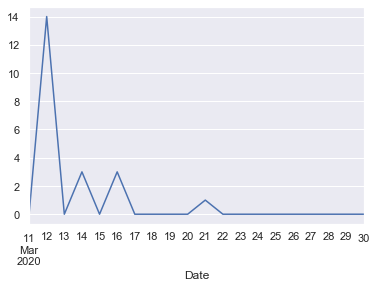

In [173]:
iran_data['Advised_quarantine'].plot();

In [174]:
china_data=sheet4[sheet4['Returnees']=='Returnees from China']

In [175]:
china_data=china_data.set_index('Date')
china_data.shape

(20, 6)

In [176]:
china_data.head()

,Returnees,Advised_quarantine,Total_firsttime_calls,Total_followup_calls,Firsttime_calls (24h),Followup_calls (24h)
Date,,,,,,
2020-03-11,Returnees from China,11,5342,7746,17,400
2020-03-12,Returnees from China,7,5352,7855,10,109
2020-03-13,Returnees from China,10,5362,8041,10,186
2020-03-14,Returnees from China,5,5370,8083,8,42
2020-03-15,Returnees from China,0,5370,8160,0,77


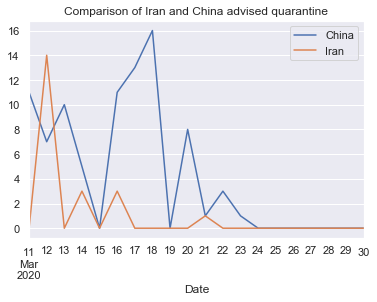

In [177]:
china_data['Advised_quarantine'].plot(label='China')
iran_data['Advised_quarantine'].plot(label='Iran')
plt.title("Comparison of Iran and China advised quarantine")
plt.legend(loc=1)
plt.show();


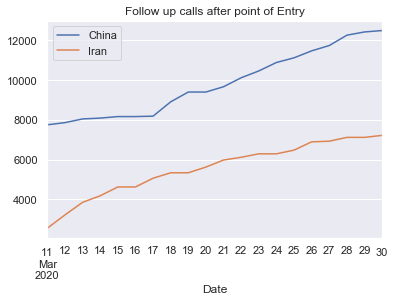

In [178]:
china_data['Total_followup_calls'].plot(label='China')
iran_data['Total_followup_calls'].plot(label='Iran')
plt.title("Follow up calls after point of Entry")
plt.legend(loc=2)
plt.show();

**Cleaning Sheet 5**

In [179]:
sheet5=covid_data.parse('TimeSeries_COVID_News')  #Opening  fifth sheet
sheet5.head()

,Unnamed: 0,Date,News,Agg News
0,0,11-Mar-2020,Updates: Pakistan:,Updates: Pakistan: \n Three new cases have bee...
1,1,11-Mar-2020,Three new cases have been confirmed in the pas...,Updates: Pakistan: \n Three new cases have bee...
2,2,11-Mar-2020,Number of calls to passengers returning from I...,Updates: Pakistan: \n Three new cases have bee...
3,3,11-Mar-2020,Global:,Updates: Pakistan: \n Three new cases have bee...
4,4,11-Mar-2020,"Total cases: 118,887, Total Deaths: 4,290 •",Updates: Pakistan: \n Three new cases have bee...


In [180]:
sheet5.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet5.head()

,Date,News,Agg News
0,11-Mar-2020,Updates: Pakistan:,Updates: Pakistan: \n Three new cases have bee...
1,11-Mar-2020,Three new cases have been confirmed in the pas...,Updates: Pakistan: \n Three new cases have bee...
2,11-Mar-2020,Number of calls to passengers returning from I...,Updates: Pakistan: \n Three new cases have bee...
3,11-Mar-2020,Global:,Updates: Pakistan: \n Three new cases have bee...
4,11-Mar-2020,"Total cases: 118,887, Total Deaths: 4,290 •",Updates: Pakistan: \n Three new cases have bee...


In [181]:
sheet5.columns=['Date','NH_news','Daily_news']

In [182]:
sheet5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
Date          146 non-null object
NH_news       146 non-null object
Daily_news    146 non-null object
dtypes: object(3)
memory usage: 3.5+ KB


In [183]:
sheet5['Date']=pd.to_datetime(sheet5['Date'])
sheet5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
Date          146 non-null datetime64[ns]
NH_news       146 non-null object
Daily_news    146 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 3.5+ KB


In [184]:
max(sheet5['Date'])

Timestamp('2020-04-03 00:00:00')

In [185]:
max(sheet4['Date'])-min(sheet4['Date'])

Timedelta('19 days 00:00:00')

In [186]:
sheet5.isnull().sum()

Date          0
NH_news       0
Daily_news    0
dtype: int64

In [187]:
print(sheet5.duplicated().sum())
sheet5.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

0


Date          0
NH_news       0
Daily_news    0
dtype: int64

In [188]:
sheet5.shape

(146, 3)

**Cleaning Sheet 6**

In [189]:
sheet6=covid_data.parse('TimeSeries_NIH_Response')  #Opening sixth sheet
sheet6.head()

,Unnamed: 0,Date,NIH Preparedness and Response,Agg NIH Preparedness and Response
0,0,11-Mar-2020,BSL-3 mobile lab with state of art equipment h...,BSL-3 mobile lab with state of art equipment h...
1,1,11-Mar-2020,IPC trainings have been completed at Gilgit an...,BSL-3 mobile lab with state of art equipment h...
2,2,11-Mar-2020,Training of the GB lab staff has been conducte...,BSL-3 mobile lab with state of art equipment h...
3,3,11-Mar-2020,IPC training is in progress for FG Hospital st...,BSL-3 mobile lab with state of art equipment h...
4,0,12-Mar-2020,BSL-3 mobile lab is ready for testing. •,BSL-3 mobile lab is ready for testing. • \n I...


In [190]:
sheet6.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet6.head()

,Date,NIH Preparedness and Response,Agg NIH Preparedness and Response
0,11-Mar-2020,BSL-3 mobile lab with state of art equipment h...,BSL-3 mobile lab with state of art equipment h...
1,11-Mar-2020,IPC trainings have been completed at Gilgit an...,BSL-3 mobile lab with state of art equipment h...
2,11-Mar-2020,Training of the GB lab staff has been conducte...,BSL-3 mobile lab with state of art equipment h...
3,11-Mar-2020,IPC training is in progress for FG Hospital st...,BSL-3 mobile lab with state of art equipment h...
4,12-Mar-2020,BSL-3 mobile lab is ready for testing. •,BSL-3 mobile lab is ready for testing. • \n I...


In [191]:
sheet6.columns=['Date','Steps_takenby_NIH','Steps_details']

In [192]:
sheet6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
Date                 65 non-null object
Steps_takenby_NIH    65 non-null object
Steps_details        65 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


In [193]:
sheet6['Date']=pd.to_datetime(sheet6['Date'])
sheet6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
Date                 65 non-null datetime64[ns]
Steps_takenby_NIH    65 non-null object
Steps_details        65 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ KB


In [194]:
min(sheet6['Date'])

Timestamp('2020-03-11 00:00:00')

In [195]:
max(sheet6['Date'])

Timestamp('2020-04-03 00:00:00')

In [196]:
max(sheet6['Date'])-min(sheet6['Date'])

Timedelta('23 days 00:00:00')

In [197]:
print(sheet6.isnull().sum())

Date                 0
Steps_takenby_NIH    0
Steps_details        0
dtype: int64


In [198]:
sheet6.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                 0
Steps_takenby_NIH    0
Steps_details        0
dtype: int64

In [199]:
sheet6.duplicated().sum()

0

In [200]:
sheet6.shape

(65, 3)

**Cleaning Sheet 7**

In [201]:
sheet7=covid_data.parse('TimeSeries_NIH_Risk')  #Opening  first sheet
sheet7.head()



 

,Unnamed: 0,Date,Risk Assessment NIH
0,0,11-Mar-2020,MODERATE.
1,0,12-Mar-2020,MODERATE.
2,0,13-Mar-2020,MODERATE.
3,0,14-Mar-2020,MODERATE.
4,0,15-Mar-2020,Moderate


In [202]:
sheet7.shape

(24, 3)

In [203]:
sheet7['Unnamed: 0'].isin([0]).sum()

24

In [204]:
sheet7.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet7.head()

,Date,Risk Assessment NIH
0,11-Mar-2020,MODERATE.
1,12-Mar-2020,MODERATE.
2,13-Mar-2020,MODERATE.
3,14-Mar-2020,MODERATE.
4,15-Mar-2020,Moderate


In [205]:
sheet7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Date                   24 non-null object
Risk Assessment NIH    24 non-null object
dtypes: object(2)
memory usage: 512.0+ bytes


In [206]:
sheet7['Date']=pd.to_datetime(sheet7['Date'])
sheet7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Date                   24 non-null datetime64[ns]
Risk Assessment NIH    24 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 512.0+ bytes


In [207]:
max(sheet7['Date'])

Timestamp('2020-04-03 00:00:00')

In [208]:
max(sheet7['Date'])-min(sheet7['Date'])

Timedelta('23 days 00:00:00')

In [209]:
print(sheet7.isnull().sum())
sheet7.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                   0
Risk Assessment NIH    0
dtype: int64


Date                   0
Risk Assessment NIH    0
dtype: int64

In [210]:
sheet7.duplicated().sum()

0

**Cleaninng Sheet 8**

In [211]:
sheet8=covid_data.parse('TimeSeries_Province_Response')  #Opening  first sheet
sheet8.head()



,Unnamed: 0,region,Provinces Preparedness and Response,Date,Agg Provinces Preparedness and Response
0,0,Balochistan,316 newly arrived individuals screened and qua...,11-Mar-2020,316 newly arrived individuals screened and qua...
1,1,Balochistan,14 Chinese nationals quarantined at East Bay E...,11-Mar-2020,316 newly arrived individuals screened and qua...
2,2,Sindh,Staff deployed to designated quarantine facili...,11-Mar-2020,Staff deployed to designated quarantine facili...
3,3,Sindh,Training and orientation sessions for the heal...,11-Mar-2020,Staff deployed to designated quarantine facili...
4,4,KP & TD,24 High Dependency Units established across KP...,11-Mar-2020,24 High Dependency Units established across KP...


In [212]:
sheet8.shape

(166, 5)

In [213]:
sheet8[sheet8['Unnamed: 0']==4]

,Unnamed: 0,region,Provinces Preparedness and Response,Date,Agg Provinces Preparedness and Response
4,4,KP & TD,24 High Dependency Units established across KP...,11-Mar-2020,24 High Dependency Units established across KP...
12,4,KP & TD,01 alert generated (self-referral) in Police a...,12-Mar-2020,01 alert generated (self-referral) in Police a...
20,4,KP & TD,"A total of 75 personnel including doctors, par...",13-Mar-2020,"A total of 75 personnel including doctors, par..."
29,4,AJK,Chest Diseases General Hospital (CDGH) Hill Ch...,14-Mar-2020,Chest Diseases General Hospital (CDGH) Hill Ch...
36,4,Sindh,Quarantine facilities established and operatio...,15-Mar-2020,Quarantine facilities established and operatio...
46,4,KP & TD,Four new suspected cases reported from Police ...,16-Mar-2020,Four new suspected cases reported from Police ...
54,4,Punjab,"PDSRU is in 24/7 coordination with NIH, Islama...",17-Mar-2020,"PDSRU is in 24/7 coordination with NIH, Islama..."
62,4,KP & TD,Quarantine facility for 171 passengers establi...,18-Mar-2020,Quarantine facility for 171 passengers establi...
70,4,AJK,Contact tracing of confirmed case being carrie...,19-Mar-2020,Contact tracing of confirmed case being carrie...
76,4,KP & TD,Contact tracing of all suspected and confirmed...,20-Mar-2020,Contact tracing of all suspected and confirmed...


In [214]:
sheet8.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet8.head()

,region,Provinces Preparedness and Response,Date,Agg Provinces Preparedness and Response
0,Balochistan,316 newly arrived individuals screened and qua...,11-Mar-2020,316 newly arrived individuals screened and qua...
1,Balochistan,14 Chinese nationals quarantined at East Bay E...,11-Mar-2020,316 newly arrived individuals screened and qua...
2,Sindh,Staff deployed to designated quarantine facili...,11-Mar-2020,Staff deployed to designated quarantine facili...
3,Sindh,Training and orientation sessions for the heal...,11-Mar-2020,Staff deployed to designated quarantine facili...
4,KP & TD,24 High Dependency Units established across KP...,11-Mar-2020,24 High Dependency Units established across KP...


In [215]:
sheet8.columns=['Region','Steps_takenby_provinces','Date','Steps_details']

In [216]:
sheet8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
Region                     166 non-null object
Steps_takenby_provinces    166 non-null object
Date                       166 non-null object
Steps_details              166 non-null object
dtypes: object(4)
memory usage: 5.3+ KB


In [217]:
sheet8['Date']=pd.to_datetime(sheet8['Date'])
sheet8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
Region                     166 non-null object
Steps_takenby_provinces    166 non-null object
Date                       166 non-null datetime64[ns]
Steps_details              166 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 5.3+ KB


In [218]:
max(sheet8['Date'])

Timestamp('2020-04-03 00:00:00')

In [219]:
max(sheet8['Date'])-min(sheet8['Date'])

Timedelta('23 days 00:00:00')

In [220]:
sheet8.isnull().sum()

Region                     0
Steps_takenby_provinces    0
Date                       0
Steps_details              0
dtype: int64

In [221]:
sheet8.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Region                     0
Steps_takenby_provinces    0
Date                       0
Steps_details              0
dtype: int64

In [222]:
sheet8.duplicated().sum()

0

In [223]:
sheet8.Region.unique()

array(['Balochistan', 'Sindh', 'KP & TD', 'GB', 'Punjab', 'AJK', 'ICT',
       'KP'], dtype=object)

In [224]:
sheet8[sheet8['Region']=='KP & TD'].shape

(20, 4)

In [225]:
sheet8.Region.value_counts()

Balochistan    36
GB             26
Sindh          26
AJK            25
Punjab         24
KP & TD        20
KP              8
ICT             1
Name: Region, dtype: int64

**Cleaning Sheet 9**

In [226]:
sheet9=covid_data.parse('TimeSeries_Helpline_Calls')  #Opening  ninth sheet
sheet9.head()


,Unnamed: 0,Cumulative Calls,Date,New Calls
0,0,12481,2020-03-11,547
1,0,13167,2020-03-12,686
2,0,13896,2020-03-13,729
3,0,15340,2020-03-14,1444
4,0,19131,2020-03-15,3791


In [227]:
sheet9.shape

(24, 4)

In [228]:
sheet9['Unnamed: 0'].isin([0]).sum()

24

In [229]:
sheet9.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet9.head()

,Cumulative Calls,Date,New Calls
0,12481,2020-03-11,547
1,13167,2020-03-12,686
2,13896,2020-03-13,729
3,15340,2020-03-14,1444
4,19131,2020-03-15,3791


In [230]:
sheet9.columns=sheet9.columns.str.strip().str.capitalize().str.replace(' ','_')

In [231]:
sheet9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Cumulative_calls    24 non-null int64
Date                24 non-null datetime64[ns]
New_calls           24 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 704.0 bytes


In [232]:
print(sheet9.isnull().sum())
sheet9.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Cumulative_calls    0
Date                0
New_calls           0
dtype: int64


Cumulative_calls    0
Date                0
New_calls           0
dtype: int64

In [233]:
sheet9.duplicated().sum()

0

In [234]:
sheet9.Date.max()-sheet9.Date.min()

Timedelta('23 days 00:00:00')

In [235]:
sheet9.Date.min()

Timestamp('2020-03-11 00:00:00')

In [236]:
sheet9.Date.max()

Timestamp('2020-04-03 00:00:00')

**Cleaning Sheet 10**

In [237]:
sheet10=covid_data.parse('TimeSeries_Quarantine_Details')  #Opening  last sheet
sheet10.head()

,Unnamed: 0,Regions,Quarantine facilities (n),No. of arrivals in last 24 hrs,Cumulative no of persons present,Date
0,0,ICT,1,0,24,2020-04-01
1,1,Punjab,4,0,2956,2020-04-01
2,2,Sindh,5,0,1388,2020-04-01
3,3,KP,92,181,3260,2020-04-01
4,4,Balochistan,9,0,366,2020-04-01


In [238]:
sheet10.shape

(21, 6)

In [239]:
sheet10.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet10.head()

,Regions,Quarantine facilities (n),No. of arrivals in last 24 hrs,Cumulative no of persons present,Date
0,ICT,1,0,24,2020-04-01
1,Punjab,4,0,2956,2020-04-01
2,Sindh,5,0,1388,2020-04-01
3,KP,92,181,3260,2020-04-01
4,Balochistan,9,0,366,2020-04-01


In [240]:
sheet10.columns=['Region','Quarantine_facilities','Arrivals (24h)','Total_persons','Date']

In [241]:
sheet10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
Region                   21 non-null object
Quarantine_facilities    21 non-null int64
Arrivals (24h)           21 non-null int64
Total_persons            21 non-null int64
Date                     21 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 968.0+ bytes


In [242]:
sheet10['Date']=pd.to_datetime(sheet10['Date']) 
sheet10.head()

,Region,Quarantine_facilities,Arrivals (24h),Total_persons,Date
0,ICT,1,0,24,2020-04-01
1,Punjab,4,0,2956,2020-04-01
2,Sindh,5,0,1388,2020-04-01
3,KP,92,181,3260,2020-04-01
4,Balochistan,9,0,366,2020-04-01


In [243]:
max(sheet10['Date'])

Timestamp('2020-04-03 00:00:00')

In [244]:
min(sheet10['Date'])

Timestamp('2020-04-01 00:00:00')

In [245]:
max(sheet10['Date'])-min(sheet10['Date'])

Timedelta('2 days 00:00:00')

In [246]:
print(sheet10.isnull().any())

Region                   False
Quarantine_facilities    False
Arrivals (24h)           False
Total_persons            False
Date                     False
dtype: bool


In [247]:
sheet10.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Region                   0
Quarantine_facilities    0
Arrivals (24h)           0
Total_persons            0
Date                     0
dtype: int64

In [248]:
sheet10.duplicated().sum()

0

In [249]:
sheet10.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

In [250]:
sheet10.Region.unique()

array(['ICT', 'Punjab', 'Sindh', 'KP', 'Balochistan', 'AJK', 'GB'],
      dtype=object)

In [251]:
sheet10[sheet10['Region']=='ICT']

,Region,Quarantine_facilities,Arrivals (24h),Total_persons,Date
0,ICT,1,0,24,2020-04-01
7,ICT,1,7,31,2020-04-02
14,ICT,6,0,30,2020-04-03


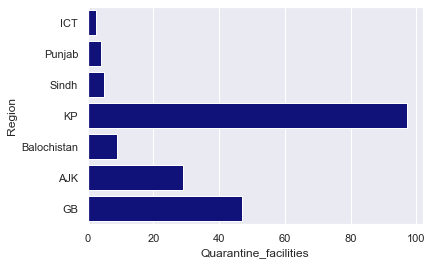

In [252]:
sns.barplot(data=sheet10,y='Region',x='Quarantine_facilities',color='darkblue',ci=None);

In [321]:
import pygsheets
client = pygsheets.authorize(service_file='C:/Users/faizah/Documents/COVID-19/Data Wrangling/covid-19-277019-1de4020c825d.json')
print("-----------------Authorized--------------------")

-----------------Authorized--------------------


In [322]:
sheet = client.open('Pak-Covid-19')
print("-----------------Sheet Opened------------------")

-----------------Sheet Opened------------------


In [323]:
wks = sheet[0]
wks.set_dataframe(sheet_1,(1,1))

In [256]:
wks = sheet[0]
wks.set_dataframe(sheet_1,(1,1))
wks=sheet[1]
wks.set_dataframe(sheet_2,(1,1))
wks=sheet[2]
wks.set_dataframe(sheet3,(1,1))
wks=sheet[3]
wks.set_dataframe(sheet4,(1,1))
wks=sheet[4]
wks.set_dataframe(sheet5,(1,1))
wks=sheet[5]
wks.set_dataframe(sheet6,(1,1))
wks=sheet[6]
wks.set_dataframe(sheet7,(1,1))
wks=sheet[7]
wks.set_dataframe(sheet8,(1,1))
wks=sheet[8]
wks.set_dataframe(sheet9,(1,1))
wks=sheet[9]
wks.set_dataframe(sheet10,(1,1))
print("-----------------Data Updated------------------")

-----------------Data Updated------------------
